# 생물정보학 및 실습 1 - Final Project

생물정보학
2022-38072
장성은

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2024년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```



## Google Drive 마운트

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 실습용 Bioconda 환경 설치하기

In [84]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Receiving objects: 100% (76/76), 318.16 KiB | 2.72 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.condarc
./root/.profile
./root/.tmux.conf
./root/.vimrc
--2024-06-04 06:50:47--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143808873 (137M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 137.15M  

# 프로그램 설치


In [85]:
!conda install -y bedtools bioawk samtools subread
!pip install pysam
!pip install logomaker

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / done

## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - bedtools
    - bioawk
    - samtools
    - subread


The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2024.3.11-~ --> conda-forge::ca-certificates-2024.6.2-hbcca054_0 
  conda              pkgs/main::conda-24.4.0-py312h06a4308~ --> conda-forge::conda-24.5.0-py312h7900ff3_0 
  libgcc-ng          pkgs/main::libgcc-ng-11.2.0-h1234567_1 --> conda-forge::libgcc-ng-13.2.0-h77fa898_7 
  libgomp              pkgs/main::libgomp-11.2.0-h1234567_1 --> conda-forge::libgomp-13.2.0-h77fa898_7 
  libstdcxx-ng       pkgs/main::libstdcxx-ng-11.2.0-h12345~ --> conda-forge::libstdcxx-ng-13.2.0-hc0a3c3a_7 
  ncurses                 pkgs/main::ncurses-6.4-h6a678d5_0 --> conda-forge::ncurses-6.5-h59595ed_0 
  openssl              pkgs/main::openssl-3.0.13-h7f8727e_1 --> conda-forg

## Figure S3C 재현하기

Transcriptome에서 error가 많이 나오는 부분들 주변 서열을 모아서 문맥을 파악합니다.


To better understand LIN28A-RNA interactions, we further
analyzed patterns around the potential LIN28A binding sites
(Figures 2A and S3C). The frequently mutated G is preceded
by two bases with strong preference for A or U and is followed
by three bases favoring G or A.

Consensus of confident binding sites from individual CLIP-seq libraries

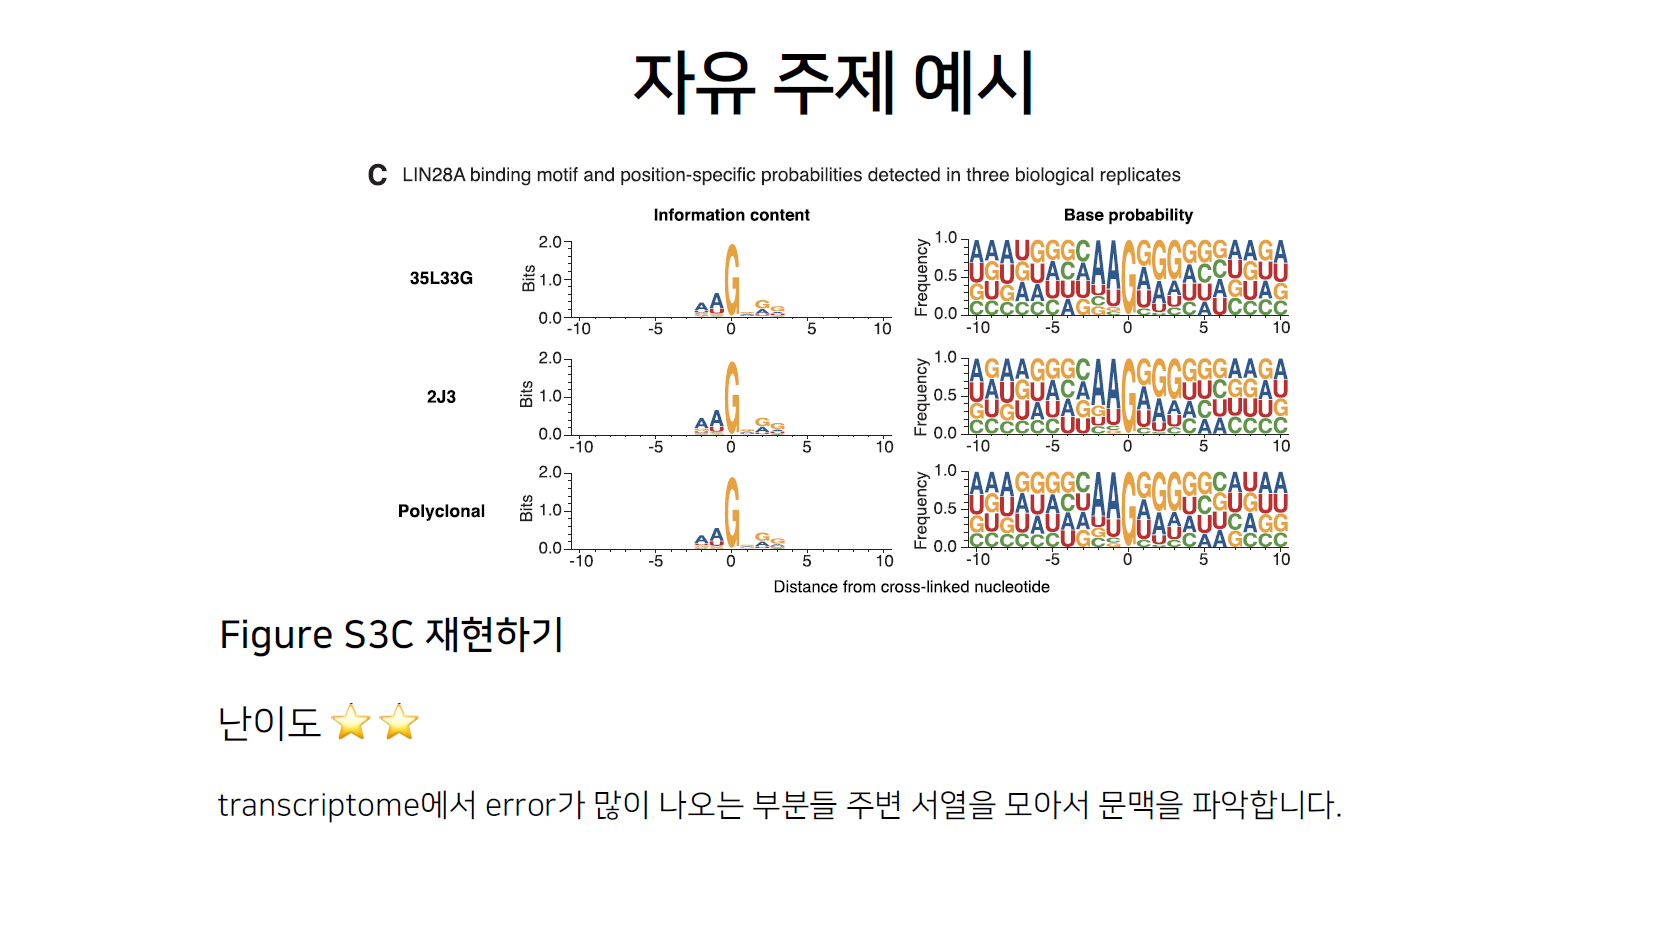

In [86]:
%cd drive/MyDrive/temp/2024-Bioinfo-1/Project/binfo1-datapack1

[Errno 2] No such file or directory: 'drive/MyDrive/temp/2024-Bioinfo-1/Project/binfo1-datapack1'
/content/drive/MyDrive/temp/2024-Bioinfo-1/Project/binfo1-datapack1


In [87]:
!ls

CLIP-35L33G.bam		colab-biolab		 RNA-control.bam.bai   RPF-siLin28a.bam.bai
CLIP-35L33G.bam.bai	exons.bed		 RNA-siLin28a.bam      RPF-siLuc.bam
CLIP-35L33G_exons.bam	gencode.gtf		 RNA-siLin28a.bam.bai  RPF-siLuc.bam.bai
CLIP-let7g.bam		read-counts.txt		 RNA-siLuc.bam
CLIP-let7g-gene.pileup	read-counts.txt.summary  RNA-siLuc.bam.bai
CLIP-let7g.pileup	RNA-control.bam		 RPF-siLin28a.bam


In [112]:
!bedtools intersect -a CLIP-35L33G.bam -b gencode-plusexon.gtf > CLIP-35L33G_exons.bam

***** WARNING: File CLIP-35L33G.bam has inconsistent naming convention for record:
GL456210.1	7142	7157	SRR458758.6758016	40	-

***** WARNING: File CLIP-35L33G.bam has inconsistent naming convention for record:
GL456210.1	7142	7157	SRR458758.6758016	40	-



In [113]:
import pysam
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math
import numpy as np
import logomaker

In [131]:
bam_file_path = "CLIP-35L33G_exons.bam"
bamfile = pysam.AlignmentFile(bam_file_path, "rb")

In [132]:
for i, read in enumerate(bamfile):
    print(read)
    if i == 5: break

SRR458758.8359967	0	#0	3143494	0	21M	*	0	0	TTGAAATGTAAATAAAGAAAA	array('B', [36, 36, 36, 23, 29, 35, 38, 35, 38, 38, 35, 36, 33, 29, 32, 31, 22, 34, 31, 31, 35])	[('MD', '21'), ('NH', 152), ('HI', 1), ('NM', 0), ('SM', 0), ('XQ', 40), ('X2', 40), ('XO', 'UM'), ('XS', '+'), ('XY', '+ENSMUST00000193812.2:19..39')]
SRR458758.20065687	0	#0	3143494	0	21M	*	0	0	TTGAAATGTAAATAAAGAAAA	array('B', [38, 38, 36, 29, 34, 32, 38, 35, 33, 32, 38, 36, 36, 31, 35, 35, 32, 31, 32, 35, 35])	[('MD', '21'), ('NH', 152), ('HI', 1), ('NM', 0), ('SM', 0), ('XQ', 40), ('X2', 40), ('XO', 'UM'), ('XS', '+'), ('XY', '+ENSMUST00000193812.2:19..39')]
SRR458758.20600894	0	#0	3143494	0	21M	*	0	0	TTGAAATGTAAATAAAGAAAA	array('B', [28, 33, 28, 25, 30, 31, 25, 26, 26, 18, 33, 30, 30, 33, 23, 28, 28, 28, 28, 28, 16])	[('MD', '21'), ('NH', 152), ('HI', 1), ('NM', 0), ('SM', 0), ('XQ', 40), ('X2', 40), ('XO', 'UM'), ('XS', '+'), ('XY', '+ENSMUST00000193812.2:19..39')]
SRR458758.30936861	0	#0	3143494	0	21M	*	0	0	TTGAAATGTAAA

In [117]:
min_mapq = 20
min_length = 20

In [126]:
binding_sites_idx = [0 for i in range(200000000)]

for read in bamfile:
    start = read.reference_start
    end = read.reference_end
    binding_sites_idx[start:end] = map((1).__add__, binding_sites_idx[start:end])

center = binding_sites_idx.index(max(binding_sites_idx))
center_start = center - 21
center_end = center + 20

print(center)

40158410


In [133]:
motif = [{'A': 0, 'U': 0, 'G': 0, 'C': 0} for i in range(41)]

for read in bamfile:
    seq = read.query_sequence
    for i, b in enumerate(seq):
        if center_start <= i + read.reference_start and i + read.reference_start < center_end:
            if b == 'A':
                motif[i + read.reference_start - center_start]["A"] += 1
            elif b == 'T':
                motif[i + read.reference_start - center_start]["U"] += 1
            elif b == 'G':
                motif[i + read.reference_start - center_start]["G"] += 1
            elif b == 'C':
                motif[i + read.reference_start - center_start]["C"] += 1

motif

[{'A': 8825, 'U': 3274, 'G': 1713545, 'C': 7847},
 {'A': 5698, 'U': 2200, 'G': 1713961, 'C': 11704},
 {'A': 7443, 'U': 2362, 'G': 1717809, 'C': 6195},
 {'A': 1720648, 'U': 4123, 'G': 6023, 'C': 3834},
 {'A': 1717566, 'U': 6835, 'G': 2795, 'C': 8408},
 {'A': 1716372, 'U': 4208, 'G': 4420, 'C': 10960},
 {'A': 10587, 'U': 2221, 'G': 5100, 'C': 1718358},
 {'A': 6752, 'U': 4156, 'G': 7581, 'C': 1719389},
 {'A': 1759554, 'U': 4753, 'G': 5806, 'C': 11468},
 {'A': 1764251, 'U': 8904, 'G': 3113, 'C': 7448},
 {'A': 1761105, 'U': 10081, 'G': 6128, 'C': 6935},
 {'A': 3422, 'U': 6834, 'G': 1763494, 'C': 12146},
 {'A': 4822, 'U': 1761717, 'G': 7855, 'C': 16893},
 {'A': 3495, 'U': 9689, 'G': 10389, 'C': 1820267},
 {'A': 3093, 'U': 1825974, 'G': 12750, 'C': 5884},
 {'A': 4769, 'U': 1822544, 'G': 15274, 'C': 5339},
 {'A': 9358, 'U': 1809326, 'G': 25115, 'C': 4188},
 {'A': 12966, 'U': 2754, 'G': 1828790, 'C': 3515},
 {'A': 11231, 'U': 6771, 'G': 1824776, 'C': 5267},
 {'A': 8120, 'U': 19967, 'G': 1809401

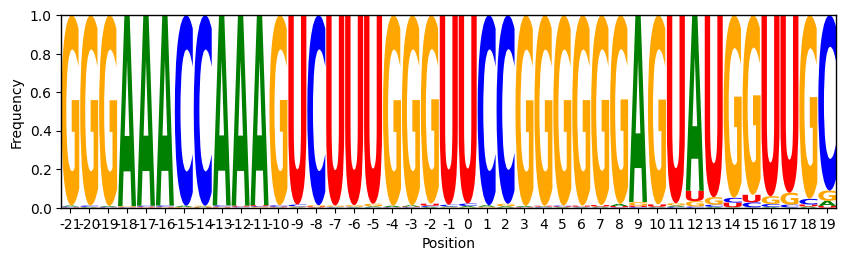

In [134]:
# 각 위치의 빈도를 데이터프레임으로 변환
positions = range(-21, 20)
bases = ['C', 'U', 'G', 'A']
data_matrix = {base: [] for base in bases}

for pos_data in motif:
    for base in bases:
        data_matrix[base].append(pos_data.get(base, 0))

# 데이터프레임 생성
df = pd.DataFrame(data_matrix, index=positions)

# 로그메이커를 사용한 시각화
# 빈도를 확률로 변환 (빈도의 합이 1이 되도록)
df_prob = df.div(df.sum(axis=1), axis=0)

# 염기서열 로고 플롯 그리기
logo = logomaker.Logo(df_prob, shade_below=.5, fade_below=.5)

# 축 설정
logo.style_xticks(anchor=0, spacing=1)
logo.style_spines(visible=True)
logo.ax.set_ylabel('Frequency')
logo.ax.set_xlabel('Position')

plt.show()

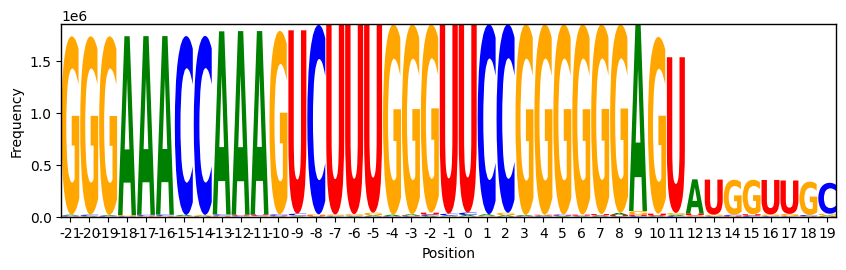

In [135]:
# 각 위치의 빈도를 데이터프레임으로 변환
positions = range(-21, 20)
bases = ['C', 'U', 'G', 'A']
data_matrix = {base: [] for base in bases}

for pos_data in motif:
    for base in bases:
        data_matrix[base].append(pos_data.get(base, 0))

# 데이터프레임 생성
df = pd.DataFrame(data_matrix, index=positions)

# 염기서열 로고 플롯 그리기
logo = logomaker.Logo(df, shade_below=.5, fade_below=.5)

# 축 설정
logo.style_xticks(anchor=0, spacing=1)
logo.style_spines(visible=True)
logo.ax.set_ylabel('Frequency')
logo.ax.set_xlabel('Position')

plt.show()